# Partie 1 du TP noté : Analyse d'images et mesures

L’objectif de cette partie est d’analyser et de trouver une solution à un cas de figure simple de traitement d’image dans un cas réaliste.
Le contexte se passe dans une usine de clé à molette. Le gérant veut pouvoir mesurer de manière automatique les contraintes sur ces dernières. Pour cela des
images ont été acquises sur la chaı̂ne de production mais celles-ci ne sont pas sans défauts.

In [945]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Import Images

In [946]:
path = os.getcwd()

img = cv2.imread(f'{path}/key_16_17.tif', cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread(f'{path}/Key_16_17_D.tif', cv2.IMREAD_GRAYSCALE)
imgL = cv2.imread(f'{path}/Key_16_17_L.tif', cv2.IMREAD_GRAYSCALE)

## Caractérisations de l'image

- Calculez l’histogramme de l’image Key 16 17.
- Décrivez l’allure de l’histogramme obtenu.
- Identifiez les différentes composantes de l’image dans l’histogramme.
- Relevez le profil d’une ligne judicieusement choisie et mettez en évidence, en relation avec l’histogramme, la notion de contraste.

### Calcul de l’histogramme :

#### Fonctions histogrammes

Nous reprenons la fonction du cours.

In [947]:
def compute_histogram(image):
    # Compute histogram manually
    histogram = np.zeros(256, dtype=int)  # Initialize array for 256 intensity values

    # Count pixel occurrences
    for pixel_value in image.flatten():  # Flatten the image to a 1D array
        histogram[pixel_value] += 1
    return histogram

import matplotlib.pyplot as plt

def plot_histogram(image, histogram):
    # Create a figure with two subplots: one for the image, one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the image on the left
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')  # Turn off the axis for the image
    ax[0].set_title("Grayscale Image")

    # Plot the histogram on the right
    ax[1].bar(range(256), histogram, color='gray', width=1.0)
    ax[1].set_xlabel("Pixel Intensity (0-255)")
    ax[1].set_ylabel("Frequency")
    ax[1].set_title("Grayscale Image Histogram")
    ax[1].set_xlim([0, 255])
    ax[1].grid(axis="y", linestyle="--", alpha=0.5)

    # Show the plots
    plt.tight_layout()
    plt.show()

#### Image key_16_17

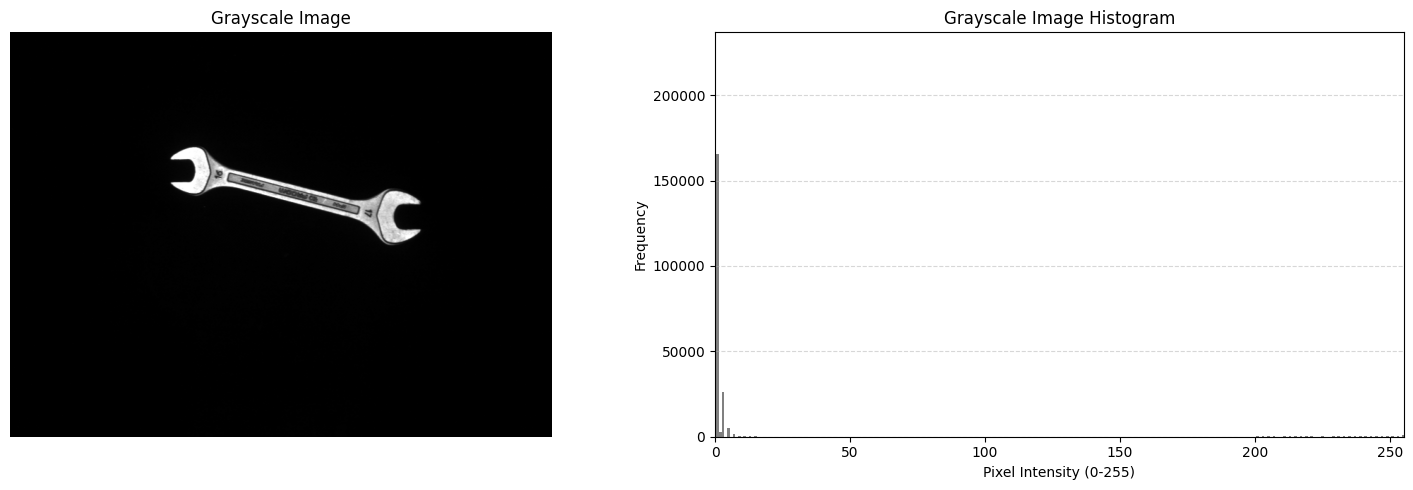

In [948]:
hist = compute_histogram(img)
plot_histogram(img, hist)

Nous pouvons voir sur cet histogramme que les valeurs sont très concentrées vers le 0, ce qui correspond à la couleur noir. Nous pouvons expliquer cela au fond noir de l'image. Les differentes composantes de cette image sont donc le fond noir, et la clé à molette, qui elle est dans différentes nuances de gris.
Nous allons à présent sélectionner une ligne verticale dans l'image afin de la comparer à l'histogramme que nous avons créé. Pour cela, nous sélectionnons une ligne verticale au milieu de l'image, afin d'avoir une partie de la clé et pas que le fond noir.

768


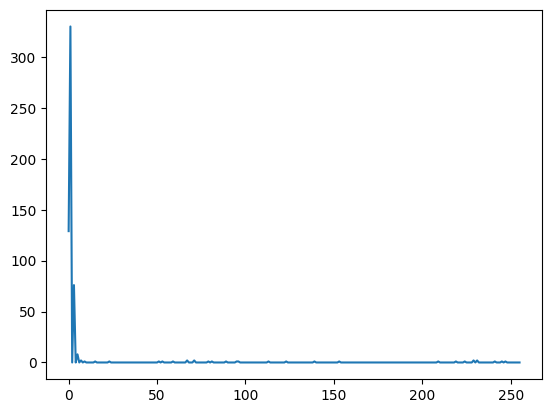

In [949]:
section_img = []
print(len(img[0]))
for i in range(len(img)):
    section_img.append(int(img[i][384]))

section_img = np.array(section_img, dtype=np.uint8)
hist = cv2.calcHist([section_img], [0], None, [256], [0, 256])
plt.plot(hist)

Nous pouvons observer que le bruit est davantage visible que sur le premier histogramme, car nous avons moins de valeurs présentes dans notre tableau. Nous voyons cependant la même tendance que sur l'histogramme réalisé sur l'ensemble de l'image, avec une forme prédominance de valeurs vers le 0, soit vers le noir, et peu de valeurs au delà.

Nous allons à présent analyser les images Key_16_17_D et Key_16_17_L.

### Comparaison des histogrammes

- Effectuez les mêmes manipulations pour les images Key 16 17 L et Key 16 17 D.
- Quelles remarques peut-on faire sur les déplacements de l’histogramme sur l’axe des niveaux de gris ?
- Qu’est ce qui peut avoir changé dans les conditions d’acquisition pour donner ce résultat ?

#### Image key_16_17D

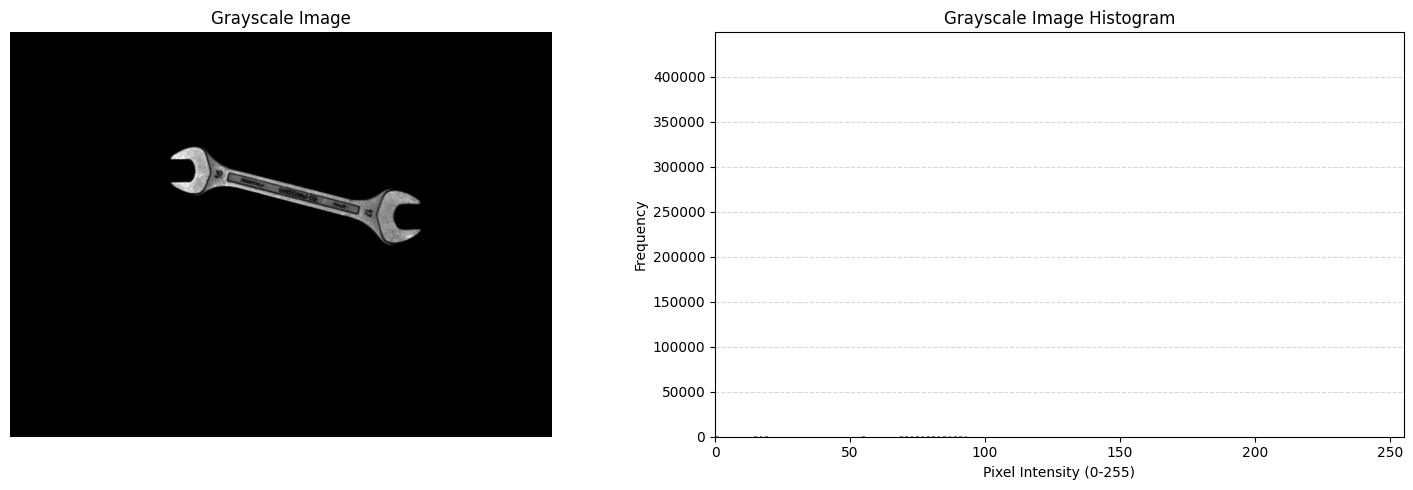

In [950]:
hist = compute_histogram(imgD)
plot_histogram(imgD, hist)

#### Image key_16_17L

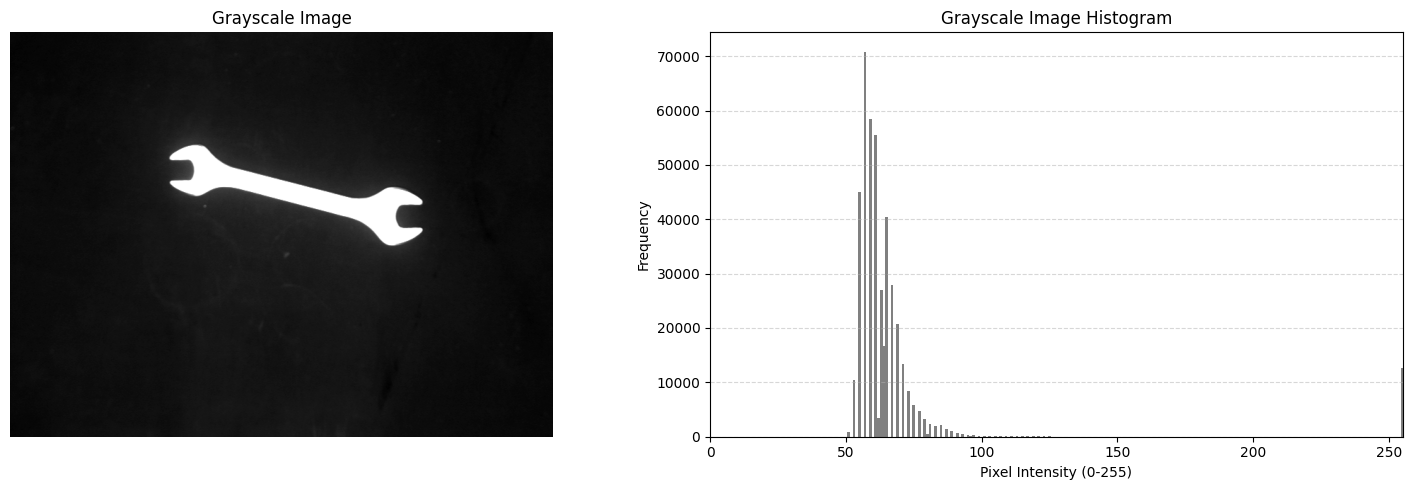

In [951]:
hist = compute_histogram(imgL)
plot_histogram(imgL, hist)

#### Conclusion des 3 histogrammes



Nous pouvons voir que l'image "D" perd les valeurs comprises au niveau de 250, et que la clé à molette est plus sombre sur l'image. Sur l'histogramme, nous ne vonyons que peu de valeurs au delà de 0. Il semblerait donc que l'image soit plus sombre que l'image originale, sûrement le résultat d'une photo prise en sous_exposition. Cette imahe contient que peu de niveau de gris, et la majorité des valeurs se trouvent à 0, soit la majorité des pixels pour cette image seront noirs.

L'image L, par contre, a beaucoup de valeurs dans le gris, entre 50 et 100, et également beaucoup de valeurs aux alentours de 256. Nous pouvons donc déterminer que l'image est en général plus claire que l'image de base, et sur la photo, la clé est très blanche, comme si la photo avait été prise en sur-exposition. Nous pouvons cependant observer que beaucoup de pixels se trouvent dans des nuances de gris, contrairement aux deux images précédentes.

### Par seuillage

- Appliquez un traitement de seuillage aux images Key 16 17_* pour séparer au mieux la clé du fond sur chaque image.
- Décrivez la méthode utilisée et justifiez vos choix.

Ce seuillage, très simple, nous permet de binariser les couleurs de l'image, afin de permettre de détacher la forme du fond. Nous utilisons pour cela un seuil, et toute valeur de pixel au delà de ce seuil prendra la valeur 256, et les autres pixels prendront la valeur 0. Il s'agit d'un seuillage binaire.

In [952]:
### Seuillage binaire
def seuillage_mask(image, seuil):
    image_binaire = np.where(image > seuil, 255, 0)
    return image_binaire.astype(np.uint8)

Pour le choix des seuils, pour l'image D, comme toutes les valeurs pour le fond sont de 0, soit noir, nous prenons la valeur 1 comme seuil. Cela signifie que toutes les valeurs supérieures à 1 prendront la valeur 256, et les autres prendront la valeur 0.
Pour l'image L, nous prenons la valeur 150, car beaucoup de valeurs du fond se situent entre 0 et 100+. Nous considérons donc que 150 sera une bonne valeur pour discriminer le fond de la clé.

In [953]:
imgD_binary = seuillage_mask(imgD, 1)
imgL_binary = seuillage_mask(imgL, 150)

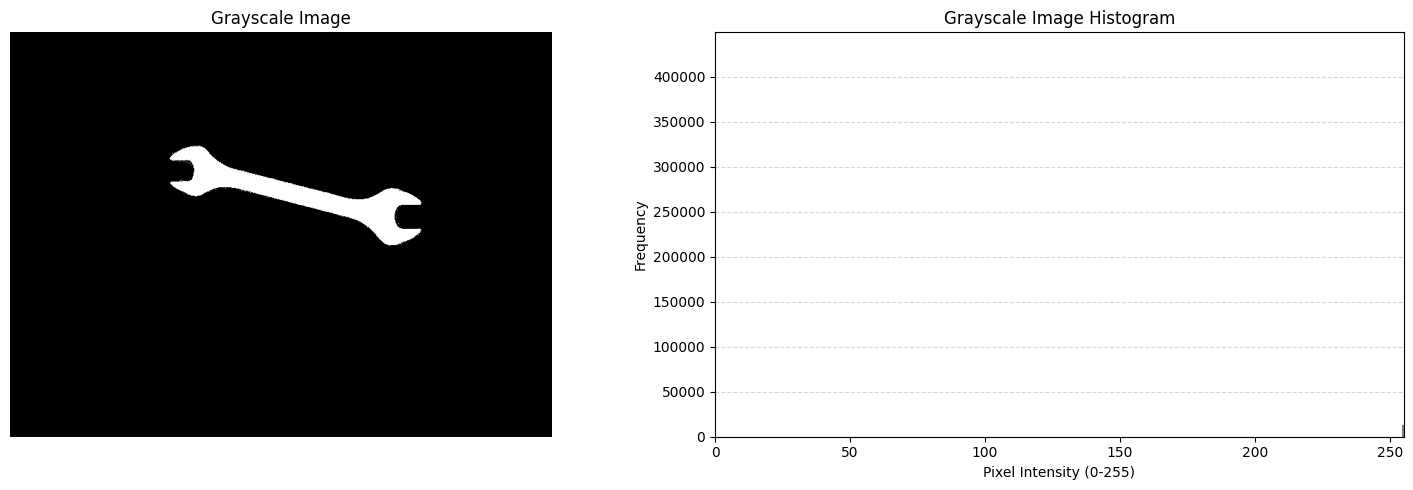

In [954]:
hist = compute_histogram(imgD_binary)
plot_histogram(imgD_binary, hist)

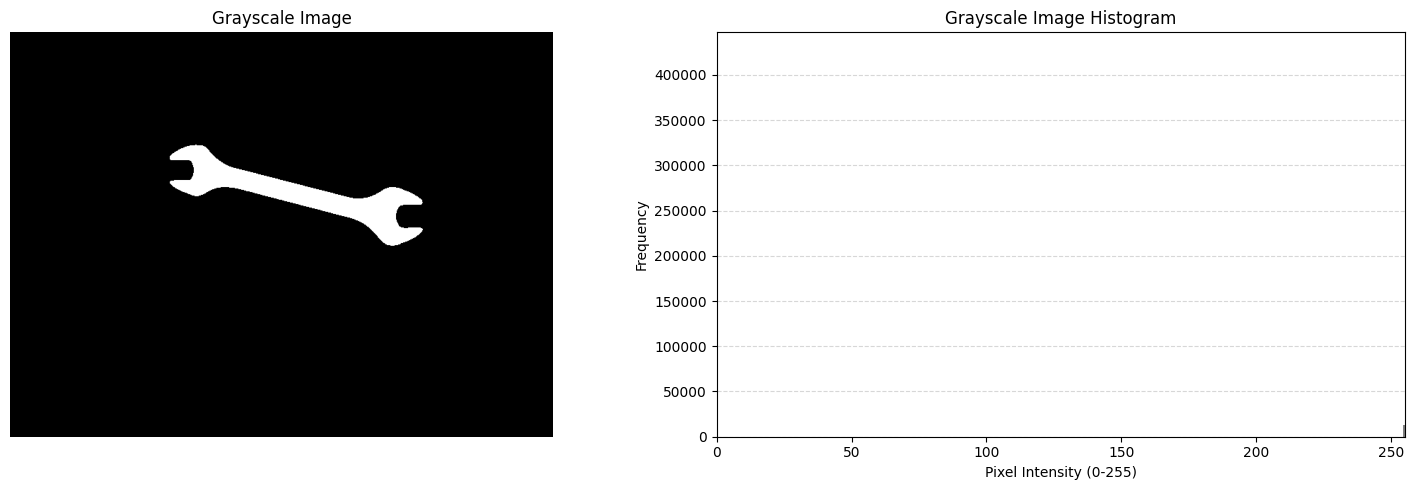

In [955]:
hist = compute_histogram(imgL_binary)
plot_histogram(imgL_binary, hist)

Nous pouvons maintenant constater que les valeurs des pixels sont soit 0, soit 256.

### Comparaison de seuillage

Peut-on à partir de l’histogramme définir les paramètres de seuillage précédents ?
- Testez les fonctions de seuillage automatique (OTSU, . . . ) et relever les valeurs de seuillage calculées automatiquement appliquées aux images Key 16 17 *.
- Comparer à celles fixées manuellement. Que conclure ?

Nous prenons la fonction du cours pour Otsu.

In [956]:
def otsu_threshold(image):
    # Calcul de l'histogramme de l'image
    hist = compute_histogram(image)

    # Normalisation de l'histogramme pour obtenir les probabilités de chaque pixel
    total_pixels = image.size
    probas = hist / total_pixels # probabilité d'aparition pour chaque pixel

    # Calcul de la moyenne globale de l'image
    global_mean = np.mean(image)

    # Initialisation des variables pour le calcul du seuil optimal
    best_threshold = 0
    max_between_class_variance = 0

    # Variables pour stocker les informations sur les classes
    w0 = 0  # Poids de la première classe (pixels <= T)
    w1 = 0  # Poids de la deuxième classe (pixels > T)
    mean0 = 0  # Moyenne de la première classe
    mean1 = 0  # Moyenne de la deuxième classe

    for t in range(256):
        w0 += probas[t]  # Update weight of class 1
        if w0 == 0 or w0 == 1:  # Avoid division by zero
            continue
        w1 = 1 - w0  # Weight of class 2

        mean0 += t * probas[t]  # Update mean of class 1
        mean1 = (global_mean - mean0) / w1  # Compute mean of class 2

        # Compute between-class variance
        between_class_variance = w0 * w1 * (mean0 / w0 - mean1) ** 2

        # Check if the variance is maximized
        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            best_threshold = t

    # Apply threshold to create binary image
    binary_image = np.where(image > best_threshold, 255, 0).astype(np.uint8)

    return best_threshold, binary_image

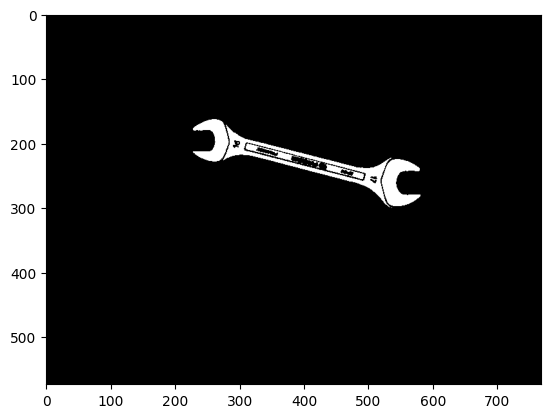

37


In [957]:
best_thresholdD, imgD_otsu = otsu_threshold(imgD)
plt.imshow(imgD_otsu, cmap="gray")
plt.show()
print(best_thresholdD)

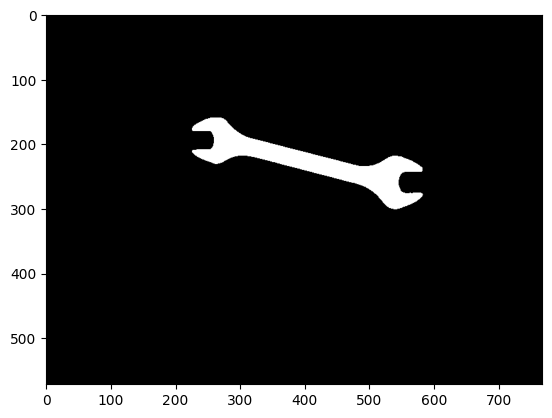

157


In [958]:
best_thresholdL, imgL_otsu = otsu_threshold(imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()
print(best_thresholdL)

Nous pouvons constater pour l'image L que le seuil trouvé automatiquement par l'algorithme Otsu est relativement proche (150 d'après notre observation de l'histogramme, et 157 avec Otsu), ce qui nous fait dire que notre lecture de l'histogramme était pertinente. Nous remarquons cependant que l'image générée avec Otsu est plus nette au niveau des contours, nous avions en effet quelques pixels parasites avec notre seuil à 150. Pour l'image D, le seuil se situe à 37 avec Otsu, contre 1 avec notre méthode manuelle, ce qui permet de mettre en exergue les détails de la clé, contrairement à notre approche où seul les contours de la clés étaient visibles.

## Pré-traitement avant contrôle dimensionnel
Dans cette première étape, l’objectif est d’extraire automatiquement une méthode de traitement d’image afin de préparer nos images à un contrôle de dimension
automatique sur l’ensemble des images Key *. Pour cela un pré-traitement des images et une définition de région d’intérêt est judicieux.

### Délimitation de la zone d’intérêt (ROI)
- Sachant que la clé est toujours positionnée approximativement au même endroit dans l’image, définissez une région d’intérêt (ROI) pertinente pour limiter l’analyse aux zones utiles et réduire le bruit.
- Justifier votre choix.

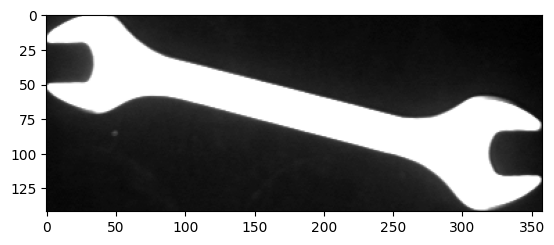

In [959]:
cnts = cv2.findContours(imgL_otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # recherche de contours (normalement 1 sur l'image surexposée avec otsu)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:  # itération sur les concours
    x,y,w,h = cv2.boundingRect(c)  #Création d'un rectangle
    ROI = [y, y+h, x, x+w]  #save les valeurs pour redimensionner l'image

imgL = imgL[ROI[0]:ROI[1], ROI[2]:ROI[3]]  #redimensionner l'image

plt.imshow(imgL, cmap="gray")

Nous commençons par sélectionner, avec l'image Key_16_17L à laquelle on a appliqué l'algorithme otsu pour la binariser, les contours. Comme l'image est très surexposée, la clé ne forme qu'un seul contour dessinant la forme de la clé, et nous pouvons donc utiliser la fonction BondingRect pour créer un rectangle autour de ce contour. Cela nous permet de resserrer l'image autour de la clé.

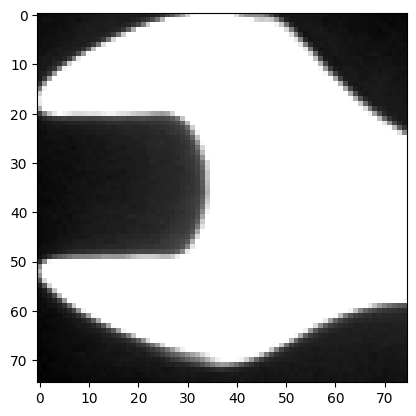

In [960]:
imgL = imgL[0:75, 0:75]  #redimensionner autour de la clé, en fonction des valeurs qui semblent convenir aussi pour une clé plus grosse sur l'image ci-dessus
plt.imshow(imgL, cmap="gray")
plt.show()

img = img[ROI[0]:ROI[1], ROI[2]:ROI[3]]
imgL = imgL[0:75, 0:75]

imgD = imgD[ROI[0]:ROI[1], ROI[2]:ROI[3]]
imgD = imgD[0:75, 0:75]

Cependant, comme notre objectif est de déterminer la taille de la largeur de serrage, nous choisissons de resizer l'image autour de la largeur de serrage en haut à gauche, puisque cette partie de la clé sera normalement toujours bien visible, peu importe la grosseur de la clé (la clé de 20 pourrait sortir du cadre à droite, car plus grosse que la clé de 16 qui nous sert à faire notre premier resize de l'image, nous risquons donc de ne pas pouvoir voir la seconde largeur de serrage).

Avec cette ROI, nous appliquons ces changements à toutes les images dans le dossier de la partie 1, sauf Etalon_45 (car elle ne montre pas une clé, mais les cercles de servant de référence pour calculer la résolution).

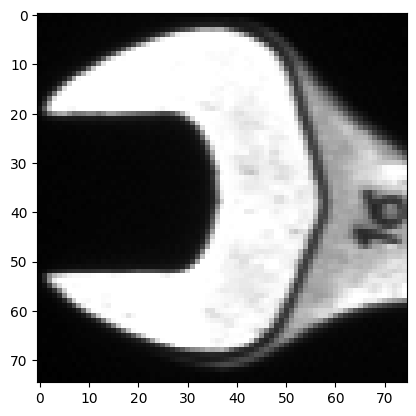

In [961]:
import os

dict_img = {}

for file in os.listdir(path):  #modification sur toutes les images du directory
    if file.endswith(".tif") and file!="Etalon_45.tif":  #sauf etalon_45, vu que c'est pas utile sur cette image
        dict_img[file] = cv2.imread(f"{path}/{file}", cv2.IMREAD_GRAYSCALE)
        dict_img[file] = dict_img[file][ROI[0]:ROI[1], ROI[2]:ROI[3]]
        dict_img[file] = dict_img[file][0:75, 0:75]
        plt.imshow(dict_img[file], cmap="gray")

### Choix d’une méthode de seuillage automatique
- Sélectionnez une méthode automatique de seuillage permettant de segmenter la clé du fond.
- Expliquez votre choix en fonction des variations possibles des conditions d’acquisition (éclairage, contraste, etc.) sur les images Key_*(Vous pouvez vous aider de la partie 1.1).
- Appliquez cette méthode à l’image Key_16_17 et observez les résultats sur la ROI définie auparavant.

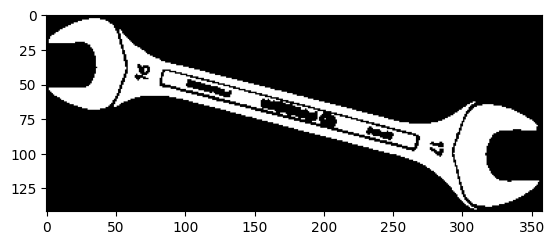

In [962]:
threshold, img_otsu = otsu_threshold(img)
plt.imshow(img_otsu, cmap="gray")

Nous conservons la methode Otsu, puisque la clé tend à se détacher très fortement du fond, et à être suffisamment éclairée, avec une lumière uniforme, pour que l'on puisse bien discerner la largeur de serrage. Nous aurions pu utiliser le seuillage adaptatif si les clés elles-mêmes étaient éclairées de manière inégales.

### Analyse de la robustesse
- Testez votre méthode de seuillage sur plusieurs images de la série Key_16_17_* afin d’évaluer sa robustesse face aux variations des conditions d’acquisition.
- Identifiez les éventuels problèmes (perte d’information, mauvaise segmentation, sensibilité au bruit) et proposez des ajustements si nécessaire.

Nous avons pu voir, sur l'image complète, et notamment dans le cas où la clé est sous-exposée, que nous avons plus de mal à détecter les contour de la clé, et notamment ceux de la largeur de serrage. Nous allons cependant voir si notre resize au niveau de la ROI permet d'aider à contourner ce problème.

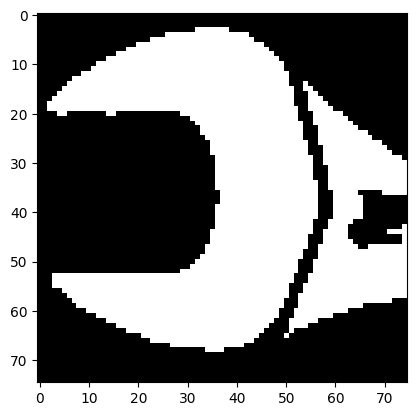

In [963]:
best_thresholdD, imgD_otsu = otsu_threshold(imgD)
plt.imshow(imgD_otsu, cmap="gray")
plt.show()

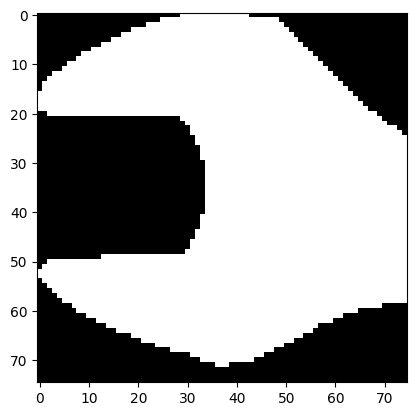

In [964]:
best_thresholdL, imgL_otsu = otsu_threshold(imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()

Puisque notre image est plus resserrée autour de la clé, nous gagnons en précision. Cependant, nous constatons que la clé sur-exposée est moins bien définie que la clé sous-exposée, avec une largeur de serrage qui semble plus petite que sur l'image normale, et l'image sous-exposée. Nous remarquons également quelques petits défauts sur la largeur de serrage de la clé sous-exposée.

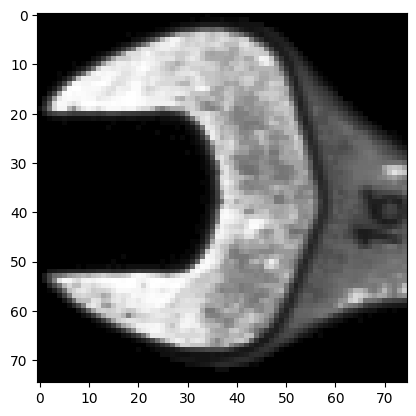

In [965]:
equalized_imgD = cv2.equalizeHist(imgD)
plt.imshow(equalized_imgD, cmap="gray")
plt.show()

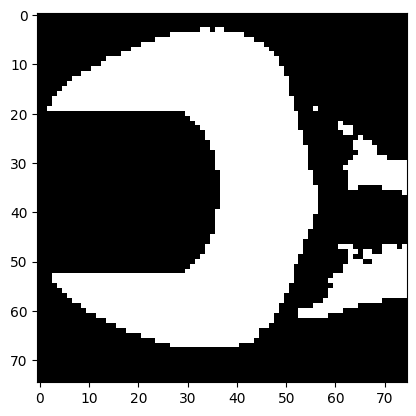

In [966]:
best_thresholdL, imgL_otsu = otsu_threshold(equalized_imgD)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()

Pour l'image Key_16_17D, nous arrivons à corriger les problèmes en égalisant l'histogramme. L'algorithme Otsu donne même maintenant de très bons résultats, avec aucun défaut sur la largeur de serrage.

Essayons de corriger les défauts de l'image Key_16_17L. L'image est surexposée, ce qui cause une espèce de halo lumineux autour de la clé, qui réfléchit la lumière, et brouille donc les contours.

In [973]:
corrected_imgL = np.array(255 * (imgL / 255) ** 0.5, dtype='uint8')

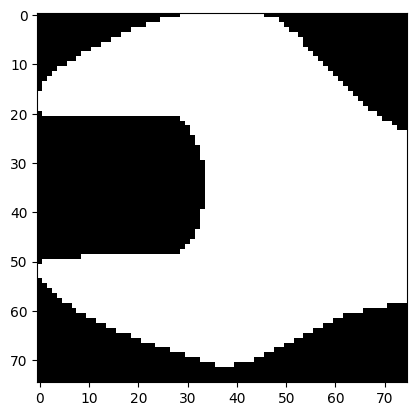

In [974]:
_, imgL_otsu = otsu_threshold(corrected_imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()

Essayer de corriger les gammas pour rendre l'image pour améliorer les contrastes ne fonctionne pas forcément très bien, nous ne voyons pas de différence. Cela pourrait s'expliquer par le fait que les détails de la clé ne sont pas vraiment discernables sur l'image, car la reflexion de la lumière les rendu indiscernable.

Essayons autre chose :

In [976]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_imgL = clahe.apply(corrected_imgL)

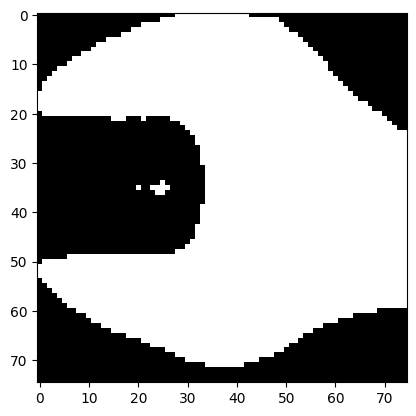

In [977]:
_, imgL_otsu = otsu_threshold(enhanced_imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()

A nouveau, cela ne nous aide guère, les coutours sont toujours faussés, et nous avons même rajoutés du bruit sur le fond. Essayons une dernière chose.

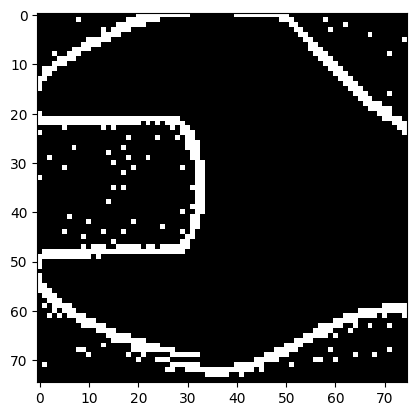

In [978]:
imgL_adapt = cv2.adaptiveThreshold(corrected_imgL, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 3, 2)
plt.imshow(imgL_adapt, cmap="gray")
plt.show()

Enfin, dernier test, nous essayons un seuillage adaptatif. Cependant, les contours retrouvés par le seuillage adaptatif sont proches de ceux retrouvés avec Otsu (Mâchoire haut de la clé vers 20 pixels en ordonnée, et 50 pixels en ordonnée pour la mâchoire du bas). De plus, dans le fond, nous voyons du bruit, rajouté par le seuillage adaptatif gaussien, probablement dû à des irrégularité du fond mis en exergue par le manque de lumière.

Ainsi, nous ne voyons pas vraiment comment améliorer cette image, il semblerait que les informations de contours de la clé soient trop brouillées pour les retrouver avec des techniques aussi simples. Il se peut que les images surexposées comme celles-ci posent donc problèmes dans nos algorithmes, et que nous n'ayons pas de moyen de rendre les contours plus précis en faisant fi de la réflexion de la lumière par le métal.

## Application au problème de contrôle dimensionnel
L’étape précédente vous à permis de sélectionner une ROI et de binariser votre
image afin de la préparer au contrôle dimensionnel. Dans cette partie nous allons
donc aborder la partie de contrôle dimensionnel automatique pour résoudre le
problème de l’usine et trouver les différentes tailles de clés à molette associées
aux images Key_* :

### Calibration
- La première opération consiste à effectuer la calibration de l’image
en utilisant l’image Etalon 45. Cette image représente une pièce de
diamètre égal à 45 mm précisément, positionnée à trois endroits.
- A l’aide de la méthode de votre choix, trouvez la résolution mm/pixel
obtenue. Expliquer votre démarche.

In [967]:
def detect_circles_and_calculate_resolution(image, known_diameter_mm=45):
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Réduction du bruit
    blurred = cv2.GaussianBlur(grey, (9, 9), 2)

    # Detection des cercles
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.3, # Accumulator : how cicular the circle is, bewtenn 0 (potato) and 2 (perfect circle)
        minDist=50,  # Distance minimum entre deux centres de cercles
        param1=50,  # Valeur de seuil pour Canny
        param2=30,  # Valeur de l'accumulator de Canny
        minRadius=10,  # Taille min périmètre cercle
        maxRadius=200  # Taille max périmètre cercle
    )

    if circles is not None:
        circles = np.uint16(np.around(circles[0, :]))  # arrondir valeurs trouvées

        diameters = [2 * r for x, y, r in circles]  # calcul des diamètres + stockage

        mean_diameter_in_pixels = np.mean(diameters) # calcul diamètre moyen

        resolution = known_diameter_mm / mean_diameter_in_pixels #calcul résolution

        # Dessiner cercles sur l'image pour visualiser
        for x, y, r in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)
            cv2.circle(image, (x, y), 2, (0, 0, 255), 3)

        plt.imshow(image, cmap="gray")
        plt.show()

        return resolution, circles

    return None, None

Nous avons utilisé une fonction appelée HoughCircle, qui permet de détecter des cercles dans une image. Pour les paramètres, nous nous sommes aidé de posts sur StackOverflow pour déterminer l'accumulator, qui permet de déterminer des cercles plus ou moins précisément. Ce paramètre prend une valeur float entre 0 et 2, avec 2 qui permet de détecter des cercles de manière très précise, au risque d'en louper si les cercles sont imparfaits. Nous choisissons donc de mettre cette valeur à 1.3, afin de détecter des cercles assez bien dessinés, sans risquer de perdre ceux qui sont plus flous. Les autres paramètres permettent de fixer la distance minumum entre les centres des cercles, le seuil pour l'algorithme de Canny, le seuil pour l'accumulator sur le seuil de l'algorithme de Canny, et les diamètres minimum et maximum détectés. Nous pouvons ensuite récupérer les diamètres des cercles, retrouvés à partir des contours, et nous faisons la moyenne des différents cercles. Nous calculons ensuite la résolution en mm/pixels, que nous retournons, avec les cercles afin de savoir combien ont été détectés.

uint8


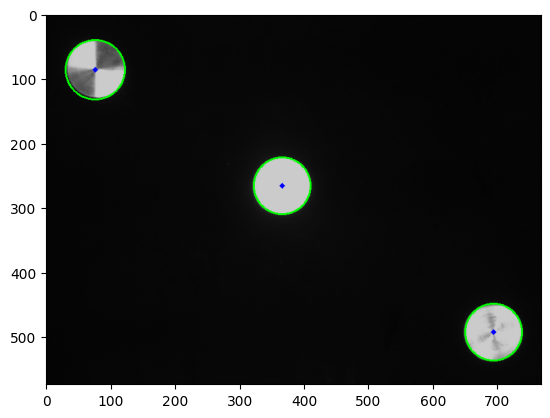

Resolution: 0.5037313432835822 mm/pixel
Number of Circles Detected: 3


In [968]:
img_etalon = cv2.imread(f'{path}/Etalon_45.tif')
print(img_etalon.dtype)
resolution, circles = detect_circles_and_calculate_resolution(img_etalon)

if resolution:
    print(f"Resolution: {resolution} mm/pixel")
    print(f"Number of Circles Detected: {len(circles)}")
else:
    print("No circles detected.")

- Quel est l’avantage de choisir une pièce circulaire pour l’étalonnage ?

Le choix d'une pièce circulaire s'explique par le fait que les cercles sont relativement simples à détecter avec OpenCV, et qu'ils ont la même valeur de rayon partout. Cela fait que le choix de la valeur a mesurer est simple, nous cherchons le rayon du cercle sur l'image en pixel pour calculer la résolution.

- Pourquoi positionner la pièce à plusieurs endroits différents ?

Positionner la pièce à plusieurs endroits différents permet d'avoir différents éclairages, et donc de faire une valeur moyenne des diamètres des différents cercles en fonction de l'éclairage, afin de se rapprocher d'une valeur de résolution idéale.

- Pourquoi choisir une pièce de faible épaisseur ?

Cela permet de ne pas fausser la valeur avec la profondeur, et de ne pas projeter d'ombres, qui pourraient rendre le traitement plus difficile.

### Choix d’une méthode de contrôle automatique
- La seconde opération est de trouver un moyen pour mesurer la largeur de serrage de la clé de l’image Key 16 17. Vous pouvez appliquer un ou plusieurs traitements (détection de contours, ...) pour mettre en évidence la zone de mesure. Vous pouvez par exemple utiliser un ou plusieurs profils de lignes pour cette mesure.
- Expliquez la méthode utilisée et le résultat obtenu.
- Appliquez votre algorithme aux autres clés pour mesurer leur largeur de serrage.
- Donner les limites (précision, éclairage, . . . ) de votre méthode.

fichier : Key_16_17_L.tif


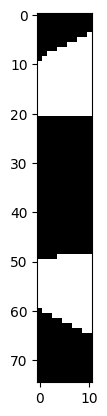

fichier : Key_8_9.tif


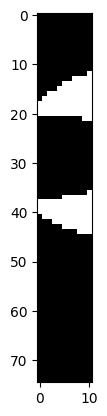

fichier : Key_20_22.tif


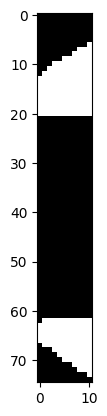

fichier : Key_12_13.tif


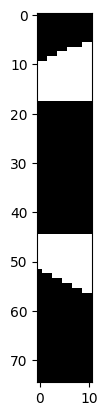

fichier : Key_16_17_D.tif


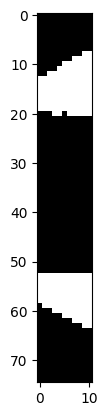

fichier : Key_14_15.tif


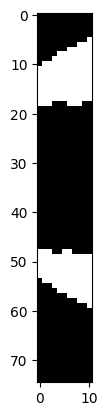

fichier : key_16_17.tif


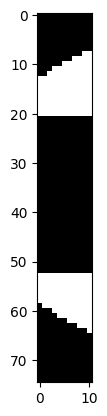

In [969]:
for wrench in dict_img.keys():  #Application du Gaussian Blur pour réduire le bruit autour des contours, et de Otsu pour binariser l'image
    img = dict_img[wrench]
    section_img = []
    img = cv2.GaussianBlur(img, (3, 3), 0)
    _, img = otsu_threshold(img)

    print(f"fichier : {wrench}")  # Sauvegarder une bande de l'image, au niveau de la largeuur de serrage
    for i in range(len(img)):
        section_img_lines = []
        for j in range(7, 18):
            section_img_lines.append(int(img[i][j]))
        section_img.append(section_img_lines)

    img = np.array(section_img)
    plt.imshow(img, cmap="gray")
    plt.show()

    dict_img[wrench] = img

Pour chacune des valeurs présentes, nous commençons par appliquer un algorithme Otsu afin de binariser notre image, et de bien séparer la clé du fond. Avant d'appliquer Otsu, nous appliquons également un léger flou Gaussien afin d'aider Otsu à bien discerner la clé. Nous sélectionnons ensuite les pixels d'abscisses 7 à 17, qui sont pour toutes les clés des pixels représentant l'écart de serrage'. Cela nous permet d'isoler l'écart de serrage, afin de pouvoir ensuite calculer l'écart de pixel moyen, pour chaque clé.

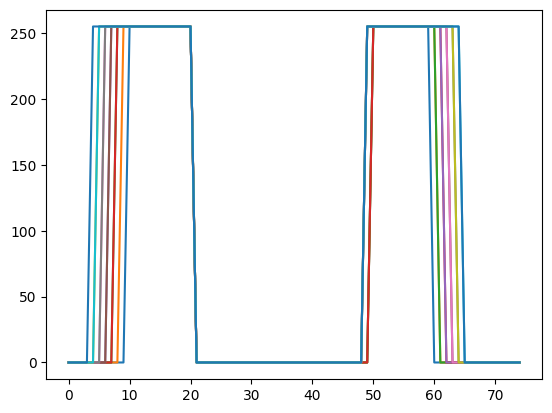

La clé du fichier Key_16_17_L.tif a une largeur de 13.80223880597015 mm


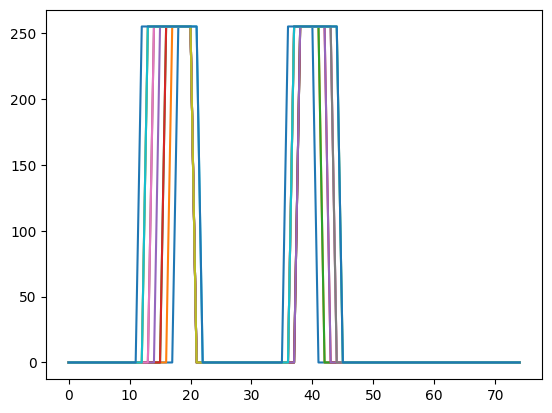

La clé du fichier Key_8_9.tif a une largeur de 7.757462686567165 mm


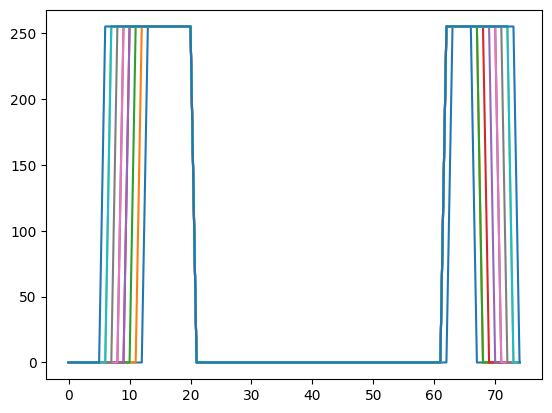

La clé du fichier Key_20_22.tif a une largeur de 20.199626865671647 mm


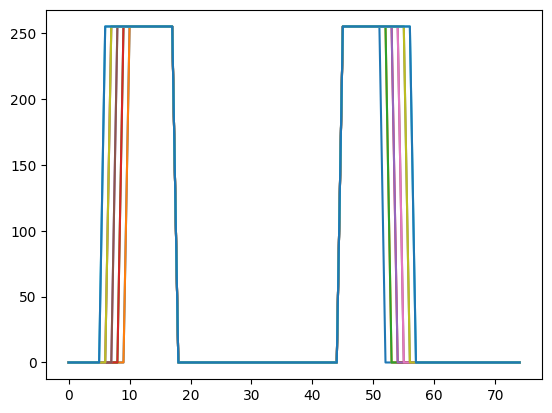

La clé du fichier Key_12_13.tif a une largeur de 13.097014925373136 mm


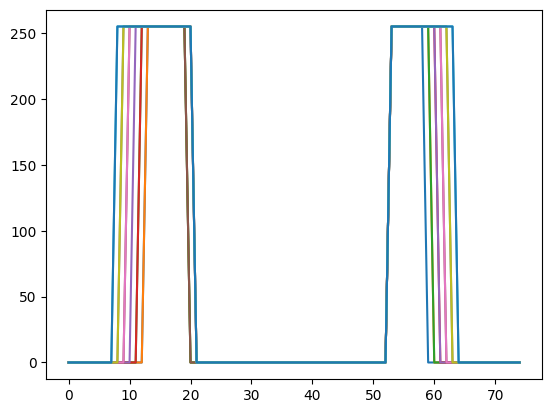

La clé du fichier Key_16_17_D.tif a une largeur de 15.817164179104479 mm


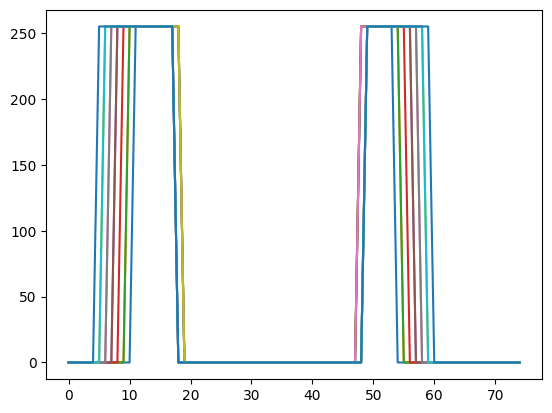

La clé du fichier Key_14_15.tif a une largeur de 14.557835820895523 mm


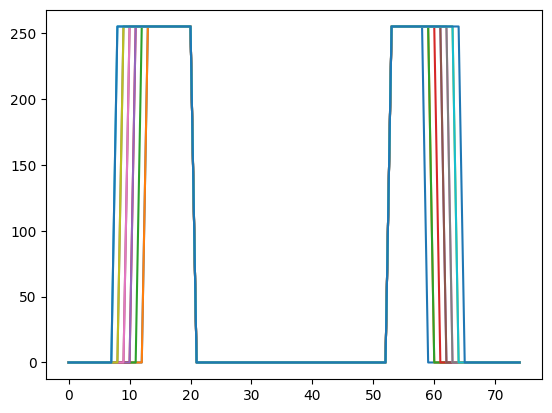

La clé du fichier key_16_17.tif a une largeur de 15.615671641791046 mm


In [970]:
def calculate_gap(list_pixels:list):  #prend une ligne verticale de pixels en entrée
    index_haut = 0
    index_bas = 0

    for k in range(len(list_pixels)-1):  #On s'arrête quand on voit un pixel blanc suivi d'un noir
        if list_pixels[k] == 255:
            if list_pixels[k+1] == 0:
                index_haut = k+1  #On retient le pixel noir
                break

    for k in range(index_haut, len(list_pixels)-1):  # On s'arrête quand on voit un pixel noir suivi d'un blanc
        if list_pixels[k] == 0:
            if list_pixels[k+1] == 255:
                index_bas = k  #On retient le pixel noir
                break

    return index_bas - index_haut  #On renvoit la distance

def calculate_mean_gap(image:np.array):
    gaps = []
    for i in range(10):
        line = []
        for j in range(len(image)):
            line.append(int(image[j][i]))
        gaps.append(calculate_gap(line))  #On sauvegarde tous les gaps
    return sum(gaps) / len(gaps)  #On renvoie la moyenne

for wrench in dict_img.keys():
    img = dict_img[wrench]
    plt.plot(img)  #Ptit graph avec les histogrammes pour chaque ligne verticale de l'image
    plt.show()

    width = calculate_mean_gap(img)
    print(f"La clé du fichier {wrench} a une largeur de {width*resolution} mm")

Nous pouvons ensuite calculer l'écart moyen, et afficher les écarts trouvés pour chaque ligne de la clé. Pour calculer l'espace, nous utilisons une fonction très simple : nous parcourons chaque ligne verticale de l'image, nous regardons quand est ce que l'image passe d'un pixel blanc à un pixel noir, nous retenons ce premier index, puis en partant de ce premier index, nous continuons à parcourir l'image, et quand l'image passe d'un pixel noir à un pixel blanc, nous retenons l'index+1(pour avoir le pixel blanc, et faire l'espace entre les deux pixels blancs). Nous faisons ensuite pour l'image la moyenne de tous ces espaces pour chaque ligne verticale, ce qui nous donne la largeur de serrage.

Commençons par noter la valeur de serrage en haut à gauche pour chaque clé.
- Key_12_13 : clé 13 en haut à gauche
- Key_14_15 : clé 15 en haut à gauche
- Key_20_22 : clé 20 en haut à gauche
- Key_16_17D : clé 16 en haut à gauche
- Key_16_17 : clé 16 en haut à gauche
- Key_8_9 : clé 8 en haut à gauche
- Key_16_17L : clé 16 en haut à gauche

Nous pouvons à présent comparer avec les valeurs que nous avons trouvé :
Nous obtenons les valeurs suivantes :
- Key_12_13 : 13,10 au lieu de 13
- Key_14_15 : 14,56 au lieu de 15
- Key_20_22 : 20,20 au lieu de 20
- Key_16_17D : 15,82 au lieu de 16
- Key_16_17 : 15,62 au lieu de 16
- Key_8_9 : 7,76 au lieu de 8
- Key_16_17L : 13,80 au lieu de 16

Nous pouvons ainsi constater que pour la majorité des clés, même si la précision est imparfaite, nous obtenons les bonnes valeurs avec un arrondi à l'unité, à l'exception de Key_16_17L, pour laquelle nous sommes loin de la valeur que nous cherchions. Cet écart peut s'expliquer par le fait que l'image est surexposée, ce qui nous empêche de bien descerner les contours, à cause de la lumière reflétée par le métal. Il s'agit là d'une des limites de notre algorithme, puisque malgré nos efforts, nous avons pas trouvé de moyen de rendre les contours plus clairs pour cette image.

Notre solution n'est pas la plus poussée, nous avons également essayé de trouver automatiquement la largeur de serrage sur l'image en dessinant des rectangles, et en sélectionnant le rectangle formé par la largeur de serrage, et nous avons également essayé de chercher les lignes parallèles dans l'image afin de retrouver la largeur de serrage. Cependant, ces deux techniques se sont avérées compliquées à mettre en oeuvre, la largeur de serrage n'étant pas assez rectangulaire, avec des angles pas assez marqués pour être reconnus par BoundingRect, et déterminer quelles lignes parallèles correspondent à la largeur de serrage s'est également avéré compliqué. Nous avons donc sélectionné cette solution, qui fonctionne dans la majorité des cas, sauf en cas de très forte surexposition.